<a href="https://colab.research.google.com/github/zeynepguney/GlobalAIHub_SummerCamp2022/blob/main/medikal_maliyet_analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pandaları   pd olarak  al  numpy'yi  np  olarak  al matplotlib.pyplot'u  plt olarak  al  
seaborn'u sns olarak  al

#LOAD DATASET

In [ ]:
df = pd.read_csv("/content/insurance.csv")
copy_df = df.copy()

In [ ]:
df.shape

(1338, 7)

Columns

age: Yaş

sex: Cinsiyet =  female, male

bmi: Vücut Kitle İndeksi 

children: Sağlık sigortası kapsamındaki çocuk sayısı / Bakmakla yükümlü sayısı

smoker: Sigara kullanımı 

region: ABD'deki yerleşim bölgesi =  northeast, southeast, southwest, northwest.

charges: Sağlık sigortası tarafından faturalandırılan bireysel tıbbi masraflar


In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#EDA (Exploratory Data Analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


BMI(Vücut Kitle İndeksinin Dağılımının İncelenmesi


BMI < 18.5  -->  Zayıf

BMI 18.5-24.9 --> Normal

BMI 25-29.9 --> Fazla Kilolu

BMI 30-34.9 --> 1. Sınıf Obez

BMI 35-39.9 --> 2. Sınıf Obez

BMI > 40 --> 3. Sınıf Obez

Text(0.5, 1.0, 'Vücut Kitle İndeksi Dağılımı')

<Figure size 720x504 with 0 Axes>

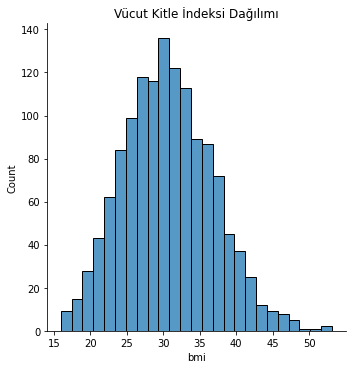

In [ ]:
plt.figure(figsize=(10,7))
sns.displot(df["bmi"])
plt.title("Vücut Kitle İndeksi Dağılımı")

smoker-charger ilişkisi

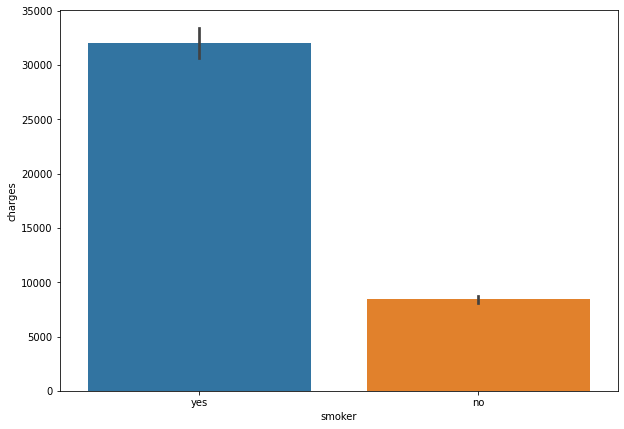

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = "smoker", y = "charges", data = df)

smoker-region ilişkisi

<Figure size 720x504 with 0 Axes>

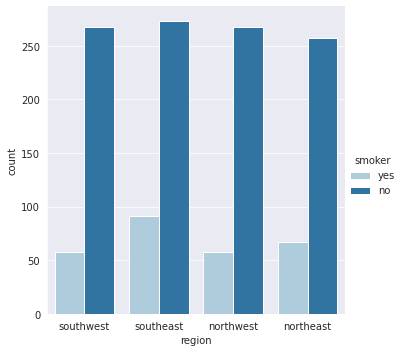

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.catplot(x ="region", data=df, kind="count", hue="smoker", palette="Paired")

bmı-sex ilişkisi

<Figure size 720x504 with 0 Axes>

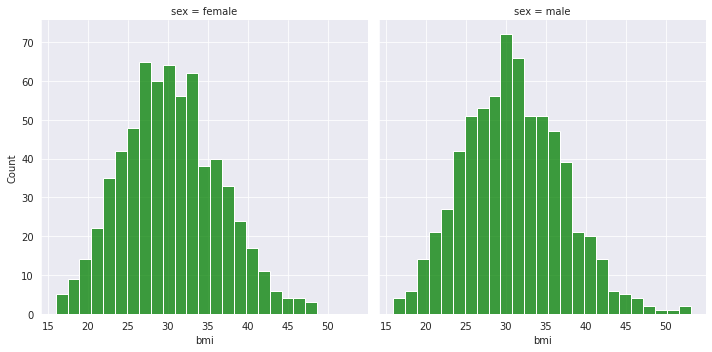

In [ ]:
plt.figure(figsize=(10,7))
sns.displot(x = "bmi", col = "sex", data = df, color="green")

En çok “children”’a sahip “region”

<Figure size 720x576 with 0 Axes>

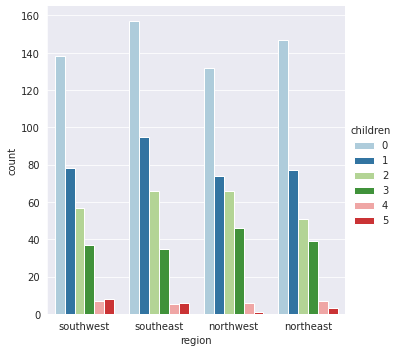

In [ ]:
plt.figure(figsize=(10,8))
sns.catplot(x ="region", data=df, kind="count", hue="children", palette="Paired")

age-bmi ilişkisi

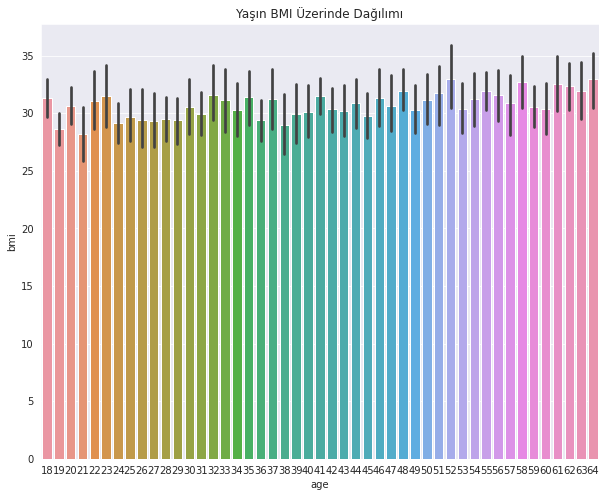

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Yaşın BMI Üzerinde Dağılımı")
sns.barplot(x ="age", y ="bmi", data = df)

bmi-children ilişkisi

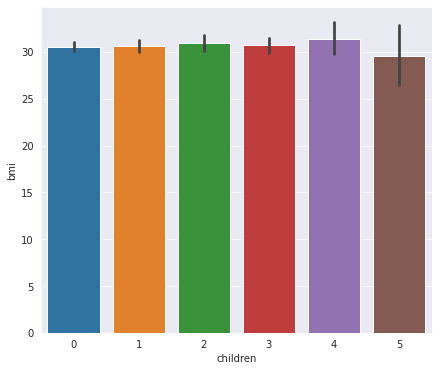

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(x ="children", y ="bmi", data = df)

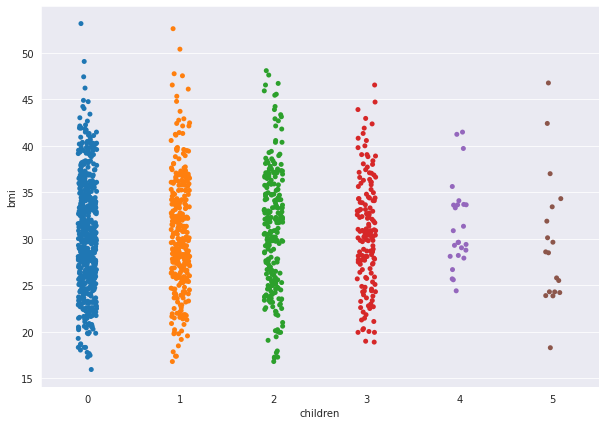

In [ ]:
plt.figure(figsize=(10,7))
sns.stripplot(y="bmi", x="children", data=df)

BMI Değişkeninde Outlier Var mıdır


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


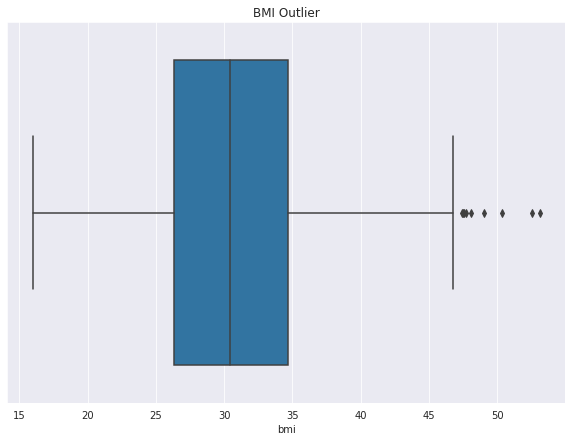

In [ ]:
plt.figure(figsize=(10,7))
plt.title("BMI Outlier")
sns.boxplot(df["bmi"])

BMI-Charges ilişkisi

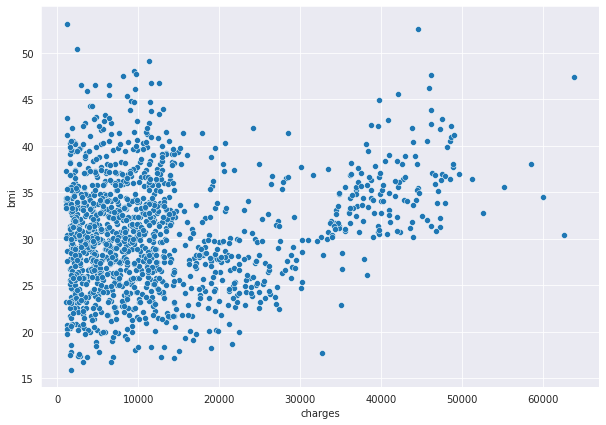

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(y="bmi", x="charges", data=df)

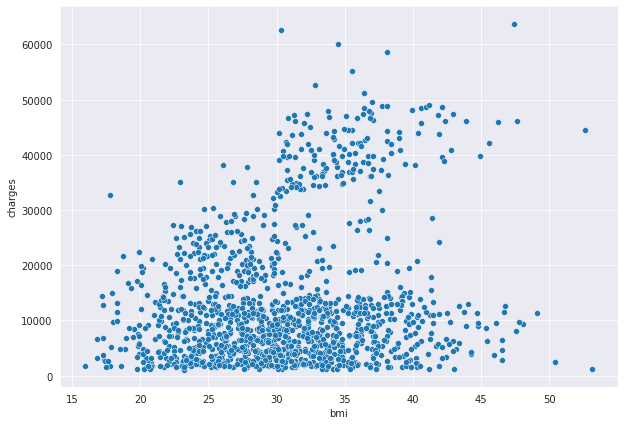

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="bmi", y="charges", data=df)

 “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

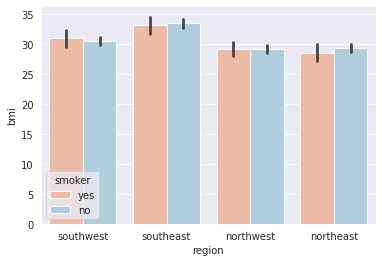

In [ ]:
sns.barplot(x="region", y="bmi", hue="smoker", data=df, palette="RdBu")

#Veri Ön İşleme Yapılması


Bu kısımda elinizde olan veriyi model eğitmek için hazır hale getiriniz.

Kategorik değişkenleri düzenlemek için Label ve One-Hot Encoding tekniklerini kullanınız.
Veri setinizi X_train,X_test, y_train, y_test olacak şekilde bölüştürünüz.
Veri setini normalize ederek ölçekleyiniz.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Kategorik değişken olup görünmeyenleri nasıl yakalayacağız
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
cat_cols

['sex', 'smoker', 'region']

In [ ]:
df["region"].nunique()

4

In [ ]:
df["smoker"].nunique()

2

In [ ]:
df["sex"].nunique() #toplamda kaç tane eşsiz değer var

2

In [ ]:
#aslında kategorik olan ama numeric olarak kodlanan değişkenleri bulmak için
# tipi int ya da float olup eşsiz sınıf sayısı belli bir değerden küçük olanları bul
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float64"]]

In [ ]:
num_but_cat

['children']

In [ ]:
# veri setindeki kategorik olarak tanımlanan ama kategorik olmayan değişkenleri de analiz etmek gerekli

cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

In [ ]:
cat_but_car

[]

In [ ]:
# veri setindeki bütün kategorik değişkenler bir arada
cat_cols = cat_cols + num_but_cat

In [ ]:
cat_cols

['sex', 'smoker', 'region', 'children']

In [ ]:
# eğer kardinal değişken olsaydı kategorik değişkenden çıkarmamız gerekird
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [ ]:
cat_cols

['sex', 'smoker', 'region', 'children']

In [ ]:
df[cat_cols]

,sex,smoker,region,children
0,female,yes,southwest,0
1,male,no,southeast,1
2,male,no,southeast,3
3,male,no,northwest,0
4,male,no,northwest,0
...,...,...,...,...
1333,male,no,northwest,3
1334,female,no,northeast,0
1335,female,no,southeast,0
1336,female,no,southwest,0


In [ ]:
# bu işlemler tutarlı mı kontrol edelim
# seçtiğimiz değişkenlerin eşsiz sınıflarına bakalım
df[cat_cols].nunique()

sex         2
smoker      2
region      4
children    6
dtype: int64

In [ ]:
# geriye kalan sayısal verilere bakalım
print([col for col in df.columns if col not in cat_cols])

['age', 'bmi', 'charges']


In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]

num_cols = [col for col in num_cols if col not in cat_cols]

In [ ]:
num_cols

['age', 'bmi', 'charges']

In [ ]:
#veri setindeki eksik değerler bakalım
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#get dummies metodu sadece kategorik değişkenleri bir araya toplar
dff = pd.get_dummies(df[cat_cols], drop_first=True)
dff.head(10)

,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,0,1,0,0,1
1,1,1,0,0,1,0
2,3,1,0,0,1,0
3,0,1,0,1,0,0
4,0,1,0,1,0,0
5,0,0,0,0,1,0
6,1,0,0,0,1,0
7,3,0,0,1,0,0
8,2,1,0,0,0,0
9,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


In [ ]:
# Değişkenlerin standartlaştırılması
scaler =MinMaxScaler() #değerleri 0 1 arasın dönüştür
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns) #dataframe e dönüştürür
dff.head()

,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.2,1.0,0.0,0.0,1.0,0.0
2,0.6,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          1338 non-null   float64
 1   sex_male          1338 non-null   float64
 2   smoker_yes        1338 non-null   float64
 3   region_northwest  1338 non-null   float64
 4   region_southeast  1338 non-null   float64
 5   region_southwest  1338 non-null   float64
dtypes: float64(6)
memory usage: 62.8 KB


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve


In [ ]:
y = df["charges"] #bağımlı değişken
X = df.drop(["charges"], axis=1) #bağımsız değişken

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [ ]:
# ayrilmis veriyi kontrol edelim
print(X_train.ndim, X_test.ndim, y_train.ndim, y_test.ndim)
print("")
print(type(X_train),type(X_test),type(y_train),type(y_test))

2 2 2 2

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
# veriyi dataframae"e donusturelim
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [ ]:
# daha iyi model performansina ulasabilmek icin veriyi olceklendirelim
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df[num_cols].head()

,age,bmi,charges
0,-1.438764,-0.453320,0.298584
1,-1.509965,0.509621,-0.953689
2,-0.797954,0.383307,-0.728675
3,-0.441948,-1.305531,0.719843
4,-0.513149,-0.292556,-0.776802


In [ ]:
y_train = scaler.fit_transform(y_train)


#model


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text


In [ ]:
df = pd.read_csv("/content/insurance.csv")


In [ ]:
y = df["charges"] #bağımlı değişken
X = df.drop(["charges"], axis=1) #bağımsız değişken

In [ ]:
X.shape

(1338, 6)

In [ ]:
y.shape

(1338,)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# eşik değer hesaplama
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3 + 1.5 * interquantile_range
    low_limit = quantile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# aykırı değer hesaplama
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

# eşik değer değiştirme
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
100 * df["charges"].value_counts() / len(df)


1639.56310     0.149477
16884.92400    0.074738
29330.98315    0.074738
2221.56445     0.074738
19798.05455    0.074738
                 ...   
7345.08400     0.074738
26109.32905    0.074738
28287.89766    0.074738
1149.39590     0.074738
29141.36030    0.074738
Name: charges, Length: 1337, dtype: float64

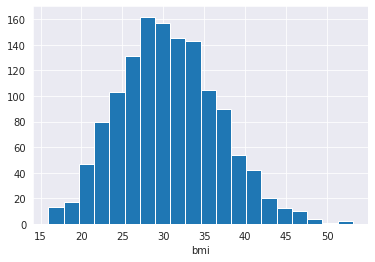

In [ ]:
# görsel olarak incelemek için - bmi

df["bmi"].hist(bins=20)
plt.xlabel("bmi")
plt.show(block=True)

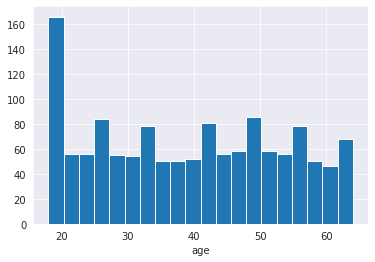

In [ ]:
# görsel olarak incelemek için - yaş
df["age"].hist(bins=20)
plt.xlabel("age")
plt.show(block=True)

In [ ]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

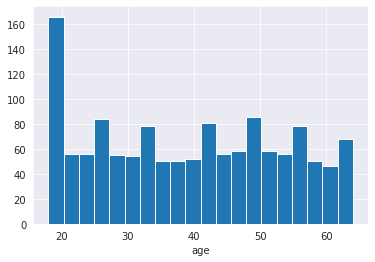

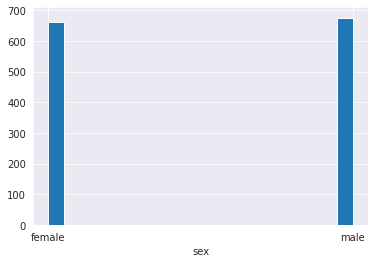

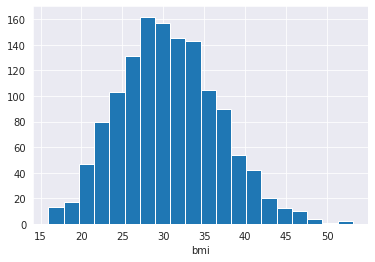

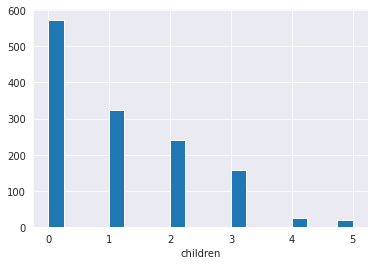

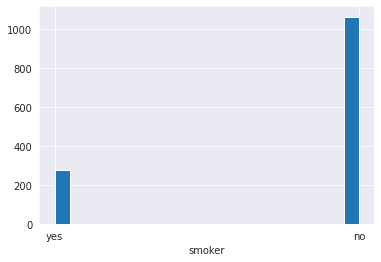

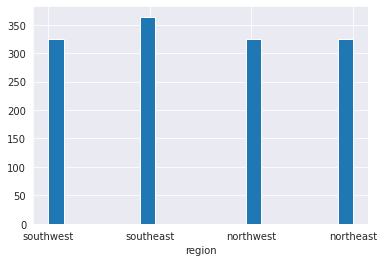

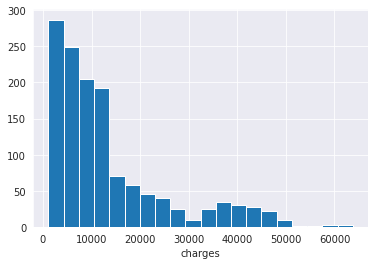

In [ ]:

for col in df.columns:
    plot_numerical_col(df, col)

In [ ]:
cols = [col for col in df.columns if "Outcome" not in col]



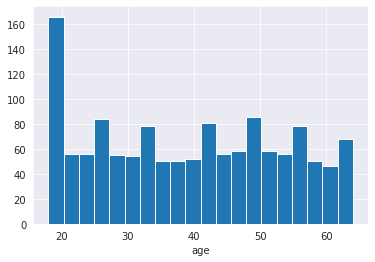

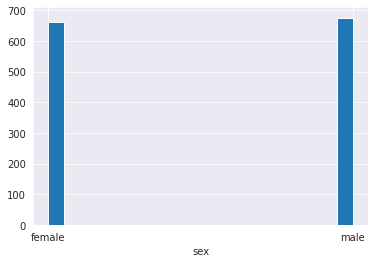

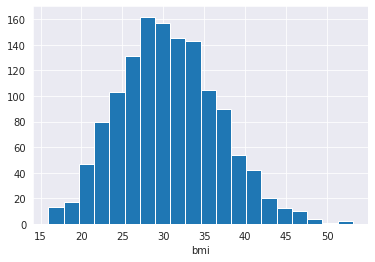

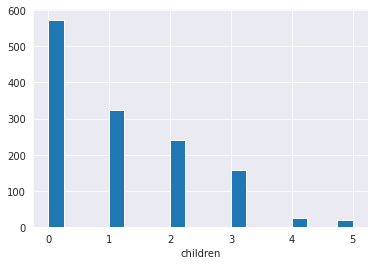

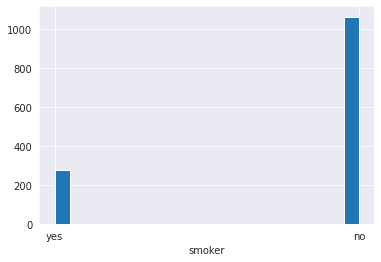

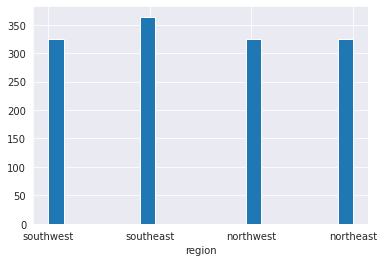

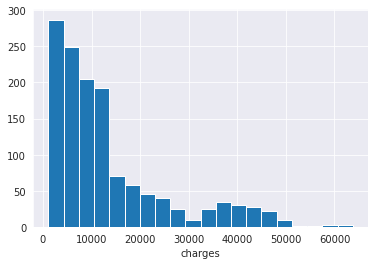

In [ ]:
for col in cols:
    plot_numerical_col(df, col)

In [ ]:
df.isnull().sum()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,0.008626,0.585415,-0.8750,-0.50000,0.000,0.500000,1.041667
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.130000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.000000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.428010


In [ ]:
y = df["charges"]
X = df.drop("charges", axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
log_model = LogisticRegression().fit(X, y)


In [ ]:
# modelin sabitine erişmek için
log_model.intercept_[0]
#ağırlıklar, katsayı
log_model.coef_

In [ ]:
#Model denklemi
# log_model.intercept_[0] + x1*x1in katsayısı + x2*x2nin katsayısı....

#Tahmin
y_pred = log_model.predict(X)
y_pred[0:10]
y[0:10]

In [ ]:
# model başarı değeri hesaplama fonksiyonu
# karmaşıklık matrisini gösterir
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel("y_pred/tahmin")
    plt.ylabel("y/gerçek")
    plt.title("Accuracy score : {0}".format(acc), size=10)
    plt.show(block=True)

plot_confusion_matrix(y, y_pred)

In [ ]:
print(classification_report(y, y_pred))


In [ ]:
# ROC AUC
#####################
# farklı th değerlerine göre genel bir metrik
y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)
# train setine modeli kuralım
log_model = LogisticRegression().fit(X_train, y_train)
# test setini modele soralım
y_pred = log_model.predict(X_test)

In [ ]:
y_prob = log_model.predict_proba(X_test)[:, 1] # olasılık değerleri


In [ ]:
print(classification_report(y_test, y_pred))


In [ ]:
# model başarısı ile ilgili grafik
plot_roc_curve(log_model, X_test, y_test)
plt.title("Roc Curve")
plt.plot([0, 1], [0,1], "r--")
plt.show(block=True)

In [ ]:
#AUC
roc_auc_score(y_test, y_prob)

In [ ]:
# Çapraz Doğrulama
y = df["charges"]
X = df.drop("charges", axis=1)


In [ ]:
log_model = LogisticRegression().fit(X, y)
# Veri seti büyük ise holdout taki gibi veri seti bölünerek işlem yapılabilir
# Veri seti küçük ise bütün veri seti ile işlem yapılabilir.

In [ ]:
cv_results = cross_validate(log_model, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])


In [ ]:
cv_results["test_accuracy"].mean() # 5 katlı


In [ ]:
cv_results["test_precision"].mean() # 5 katlı


In [ ]:
cv_results["test_recall"].mean() # 5 katlı


In [ ]:
cv_results["test_f1"].mean() # 5 katlı


In [ ]:
cv_results["test_roc_auc"].mean() # 5 katlı
